In [70]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.preprocessing import StandardScaler
import cufflinks as cf
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [71]:
imdb_data = pd.read_csv('imdb_data.csv', usecols = ['movieId', 'title_cast', 'director', 'plot_keywords'])

In [72]:
imdb_data.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director                                      plot_keywords  
0        John Lasseter                   toy|rivalry|cowboy|cgi animation  
1   Jonathan Hensleigh                   board game|adventurer|fight|game  
2  Mark Steven Johnson                         boat|lake|neighbor|rivalry  
3       Terry McMillan  black american|husband wife relationship|betra...  
4       Albert Hackett                    fatherhood|doberman|dog|mansion

In [73]:
imdb_data.isna().sum() / imdb_data.shape[0]

movieId          0.000000
title_cast       0.369089
director         0.361977
plot_keywords    0.406115
dtype: float64

In [74]:
movies_data = pd.read_csv('movies.csv')

In [75]:
movies_data.isna().sum() / movies_data.shape[0]

movieId    0.0
title      0.0
genres     0.0
dtype: float64

In [76]:
movies_data.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [77]:
def mergeData(main_df, other_df, on = ['movieId']):
    data = pd.merge(
        left = main_df,
        right = other_df,
        on = on,
        how = 'inner'
    )
    return data

In [78]:
item_data = mergeData(main_df = imdb_data, other_df = movies_data).drop_duplicates()

In [79]:
item_data.isna().sum() / item_data.shape[0]

movieId          0.000000
title_cast       0.388683
director         0.382812
plot_keywords    0.421539
title            0.000000
genres           0.000000
dtype: float64

In [80]:
item_data.fillna('Unknown', inplace = True)

In [81]:
text_corpus = [row[2].replace(' ', '').replace('|', ' ') + ' ' + row[3].replace('|', ' ') for row in item_data.itertuples()]

In [84]:
pd.set_option('display.max_columns', None)
df_actors = pd.DataFrame(X_cnt_actors)
df_actors.columns = cntizer.get_feature_names()
df_actors.head(5)

50cent  aakekalliala  aamirkhan  aaron  aaronabrams  aaroneckhart  \
0       0             0          0      0            0             0   
1       0             0          0      0            0             0   
2       0             0          0      0            0             0   
3       0             0          0      0            0             0   
4       0             0          0      0            0             0   

   aaronkwok  aaronpaul  aaronpearl  aaronstanford  aarontaylor  aaronyoo  \
0          0          0           0              0            0         0   
1          0          0           0              0            0         0   
2          0          0           0              0            0         0   
3          0          0           0              0            0         0   
4          0          0           0              0            0         0   

   aasifmandvi  abbas  abbiecornish  abhishekbachchan  abigailbreslin  \
0            0      0             0                 0               0   
1            0      0             0                 0               0   
2            0      0             0                 0               0   
3            0      0             0                 0               0   
4            0      0             0                 0               0   

   abigailspencer  abo  abrahambenrubi  abrams  ackerman  adam  adamarkin  \
0               0    0               0       0         0     0          0   
1               0    0               0       0         0     0          0   
2               0    0               0       0         0     0          0   
3               0    0               0       0         0     0          0   
4               0    0               0       0         0     0          0   

   adambaldwin  adambeach  adambrody  adambrown  adamcarolla  adamgoldberg  \
0            0          0          0          0            0             0   
1            0          0          0          0            0             0   
2            0          0          0          0            0             0   
3            0          0          0          0            0             0   
4            0          0          0          0            0             0   

   adamlefevre  adams  adamsandler  adamscott  adamtrese  adenyoung  \
0            0      0            0          0          0          0   
1            0      0            0          0          0          0   
2            0      0            0          0          0          0   
3            0      0            0          0          0          0   
4            0      0            0          0          0          0   

   adewaleakinnuoye  aditya  adler  adrianabarraza  adriandunbar  \
0                 0       0      0               0             0   
1                 0       0      0               0             0   
2                 0       0      0               0             0   
3                 0       0      0               0             0   
4                 0       0      0               0             0   

   adrianelenox  adriangrenier  adrianholmes  adrianlester  adrianmartinez  \
0             0              0             0             0               0   
1             0              0             0             0               0   
2             0              0             0             0               0   
3             0              0             0             0               0   
4             0              0             0             0               0   

   adriannepalicki  adrianrawlins  adrianscarborough  adrienbrody  \
0                0              0                  0            0   
1                0              0                  0            0   
2                0              0                  0            0   
3                0              0                  0            0   
4                0              0                  0            0   

   adrienneshell

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer
cntizer = CountVectorizer(max_features=5000) 

tfizer = TfidfTransformer()

X_cnt_actors = cntizer.fit_transform(item_data['text']).toarray()

In [82]:
item_data['text'] = pd.Series(text_corpus)

Text(0, 0.5, 'Cumulative explained variance')

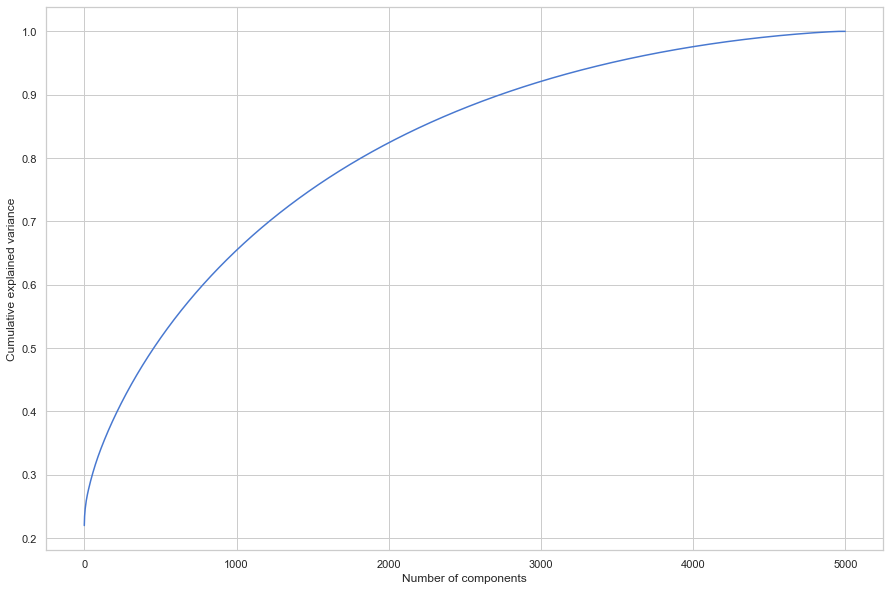

In [85]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(df_actors)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

#### roughly 3000 principal components will be required to explain 90% of the data. 


In [42]:
item_data['Text Director'] = item_data['director'].str.replace(" ","")

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
cntizer = CountVectorizer(max_features=3000) 

X_cnt_director = cntizer.fit_transform(item_data['Text Director']).toarray()

In [53]:
pd.set_option('display.max_columns', None)
df_directors = pd.DataFrame(X_cnt_director)
df_directors.columns = cntizer.get_feature_names()
#df_directors.head(5)

In [54]:
df_directors.head(5)

11  aaronguzikowski  aaronj  aaronkatz  aaronmoorhead  aaronseltzer  \
0   0                0       0          0              0             0   
1   0                0       0          0              0             0   
2   0                0       0          0              0             0   
3   0                0       0          0              0             0   
4   0                0       0          0              0             0   

   aaronsorkin  abaire  abbaskiarostami  abbykohn  abdellatifkechiche  \
0            0       0                0         0                   0   
1            0       0                0         0                   0   
2            0       0                0         0                   0   
3            0       0                0         0                   0   
4            0       0                0         0                   0   

   abderrahmanesissako  abelferrara  abrams  adambernstein  adambhalalough  \
0                    0            0       0              0               0   
1                    0            0       0              0               0   
2                    0            0       0              0               0   
3                    0            0       0              0               0   
4                    0            0       0              0               0   

   adambrooks  adamcooper  adamdubin  adamgreen  adamherz  adamleff  \
0           0           0          0          0         0         0   
1           0           0          0          0         0         0   
2           0           0          0          0         0         0   
3           0           0          0          0         0         0   
4           0           0          0          0         0         0   

   adammarcus  adammason  adammazer  adammoreno  adamresnick  adamrifkin  \
0           0          0          0           0            0           0   
1           0          0          0           0            0           0   
2           0          0          0           0            0           0   
3           0          0          0           0            0           0   
4           0          0          0           0            0           0   

   adamsandler  adamsimon  adihasak  adityachopra  adolfoaristarain  \
0            0          0         0             0                 0   
1            0          0         0             0                 0   
2            0          0         0             0                 0   
3            0          0         0             0                 0   
4            0          0         0             0                 0   

   adrianobolzoni  adrienneshelly  adriángarcíabogliano  agnieszkaholland  \
0               0               0                     0                 0   
1               0               0                     0                 0   
2               0               0                     0                 0   
3               0               0                     0                 0   
4               0               0                     0                 0   

   agnèsjaoui  agnèsvarda  agustíndíazyanes  ahmedahmed  aimeelagos  \
0           0           0                 0           0           0   
1           0           0                 0           0           0   
2           0           0                 0           0           0   
3           0           0                 0           0           0   
4           0           0                 0           0           0   

   akikaurismäki  akiratoriyama  akivagoldsman  alainchabat  alaincorneau  \
0              0              0              0            0             0   
1              0              0              0            0             0   
2              0              0              0            0             0   
3              0              0              0            0             0   
4              0              0              0            0     

Text(0, 0.5, 'Cumulative explained variance')

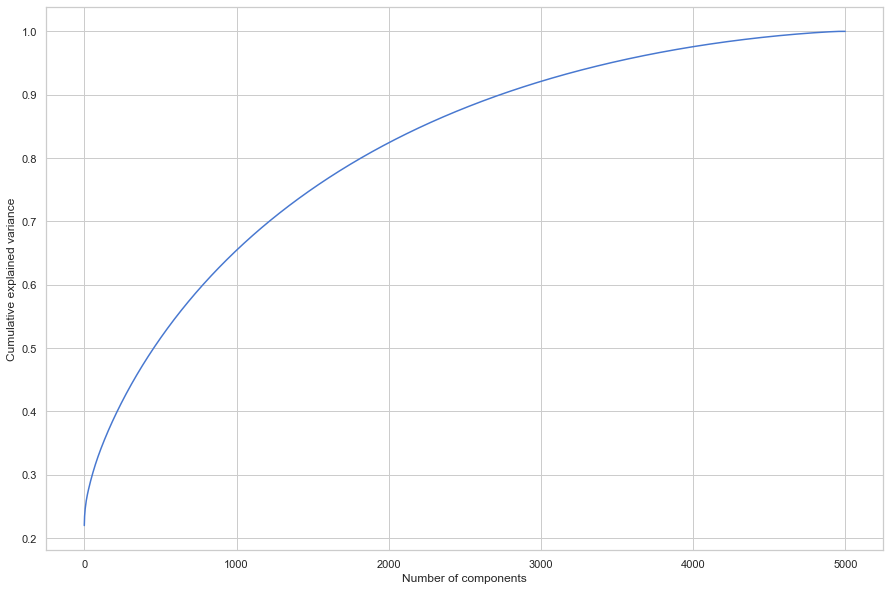

In [55]:
# define PCA object
pca_directors = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp_dir = pca_directors.fit_transform(df_directors)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp_dir)

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [59]:
item_data['Text keywords'] = item_data['plot_keywords'].str.replace('|',' ')

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer
cntizer = CountVectorizer(max_features=5000) 

tfizer = TfidfTransformer()

X_cnt_plot_keywords = cntizer.fit_transform(item_data['Text keywords']).toarray()

In [61]:
pd.set_option('display.max_columns', None)
df_keywords = pd.DataFrame(X_cnt_plot_keywords)
df_keywords.columns = cntizer.get_feature_names()
#df_keywords.head(5)

Text(0, 0.5, 'Cumulative explained variance')

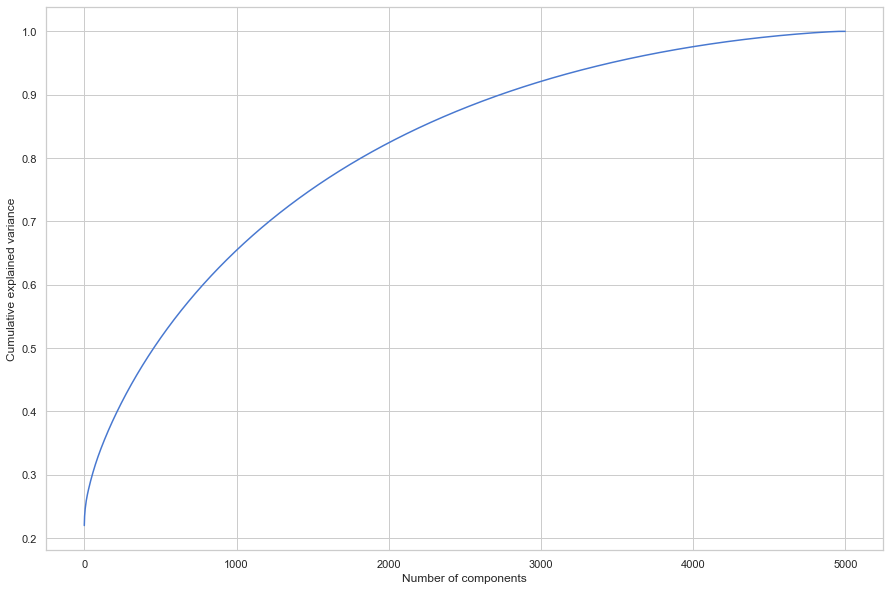

In [62]:
# define PCA object
pca_keywords = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp_key = pca_keywords.fit_transform(df_keywords)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp_key)

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [63]:
item_data['Text genres'] = item_data['genres'].str.replace('|',' ')

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
cntizer = CountVectorizer(max_features=5000) 

tfizer = TfidfTransformer()

X_cnt_genres = cntizer.fit_transform(item_data['Text genres']).toarray()

In [65]:
pd.set_option('display.max_columns', None)
df_genres = pd.DataFrame(X_cnt_genres)
df_genres.columns = cntizer.get_feature_names()
#df_genres.head(5)

Text(0, 0.5, 'Cumulative explained variance')

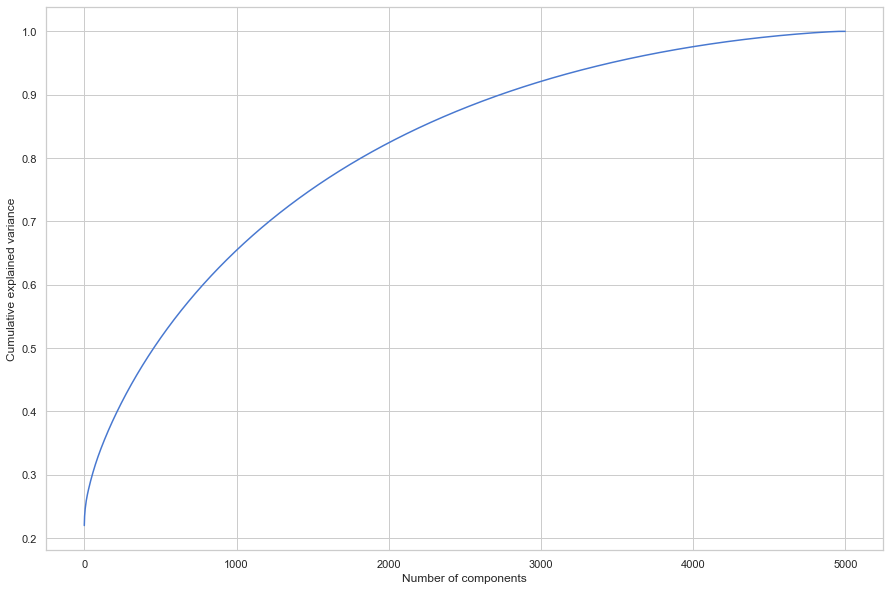

In [66]:
# define PCA object
pca_genres = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp_gen = pca_genres.fit_transform(df_genres)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp_gen)

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [67]:
df_row = pd.concat([item_data['movieId'], df_actors, df_directors, df_keywords, df_genres], axis=1)

In [68]:
df_row.head()

movieId  50cent  aakekalliala  aamirkhan  aaron  aaronabrams  aaroneckhart  \
0        1       0             0          0      0            0             0   
1        2       0             0          0      0            0             0   
2        3       0             0          0      0            0             0   
3        4       0             0          0      0            0             0   
4        5       0             0          0      0            0             0   

   aaronkwok  aaronpaul  aaronpearl  aaronstanford  aarontaylor  aaronyoo  \
0          0          0           0              0            0         0   
1          0          0           0              0            0         0   
2          0          0           0              0            0         0   
3          0          0           0              0            0         0   
4          0          0           0              0            0         0   

   aasifmandvi  abbas  abbiecornish  abhishekbachchan  abigailbreslin  \
0            0      0             0                 0               0   
1            0      0             0                 0               0   
2            0      0             0                 0               0   
3            0      0             0                 0               0   
4            0      0             0                 0               0   

   abigailspencer  abo  abrahambenrubi  abrams  ackerman  adam  adamarkin  \
0               0    0               0       0         0     0          0   
1               0    0               0       0         0     0          0   
2               0    0               0       0         0     0          0   
3               0    0               0       0         0     0          0   
4               0    0               0       0         0     0          0   

   adambaldwin  adambeach  adambrody  adambrown  adamcarolla  adamgoldberg  \
0            0          0          0          0            0             0   
1            0          0          0          0            0             0   
2            0          0          0          0            0             0   
3            0          0          0          0            0             0   
4            0          0          0          0            0             0   

   adamlefevre  adams  adamsandler  adamscott  adamtrese  adenyoung  \
0            0      0            0          0          0          0   
1            0      0            0          0          0          0   
2            0      0            0          0          0          0   
3            0      0            0          0          0          0   
4            0      0            0          0          0          0   

   adewaleakinnuoye  aditya  adler  adrianabarraza  adriandunbar  \
0                 0       0      0               0             0   
1                 0       0      0               0             0   
2                 0       0      0               0             0   
3                 0       0      0               0             0   
4                 0       0      0               0             0   

   adrianelenox  adriangrenier  adrianholmes  adrianlester  adrianmartinez  \
0             0              0             0             0               0   
1             0              0             0             0               0   
2             0              0             0             0               0   
3             0              0             0             0               0   
4             0              0             0             0               0   

   adriannepalicki  adrianrawlins  adrianscarborough  adrienbrody  \
0                0              0                  0            0   
1                0              0                  0            0   
2                0              0                  0            0   
3                0              0                  0            0   
4                0              